In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

In [6]:
df=sns.load_dataset('titanic')

In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [23]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [30]:
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])


In [31]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [32]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [35]:
numeric_columns=['age', 'fare',"pclass", 'sibsp', 'parch']


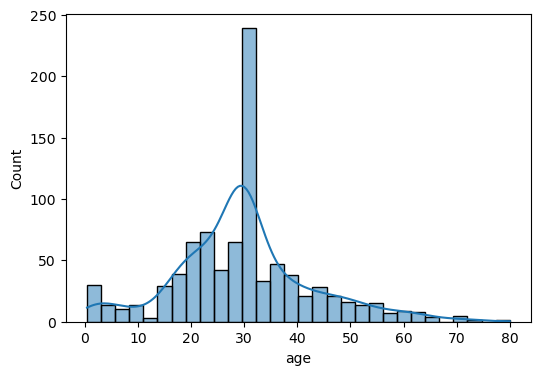

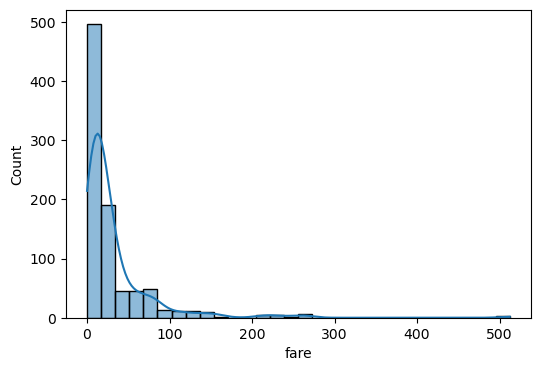

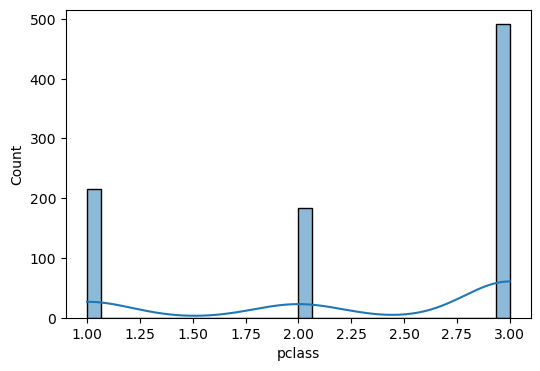

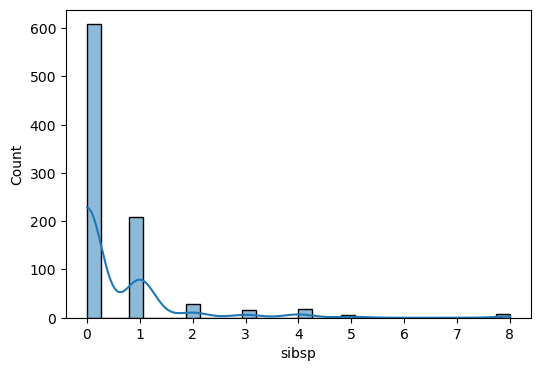

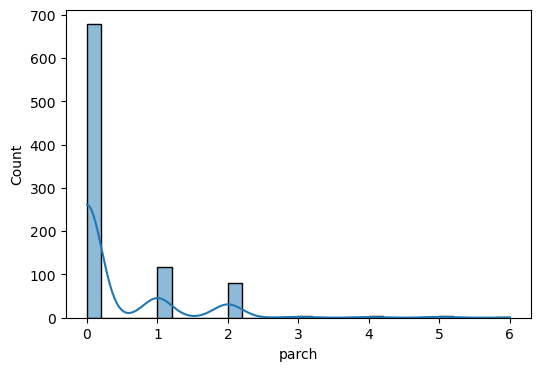

In [36]:
for cols in numeric_columns:
    plt.figure(figsize=(6,4))
    
    sns.histplot(df[cols], kde=True, bins=30)
   

<Axes: xlabel='fare', ylabel='count'>

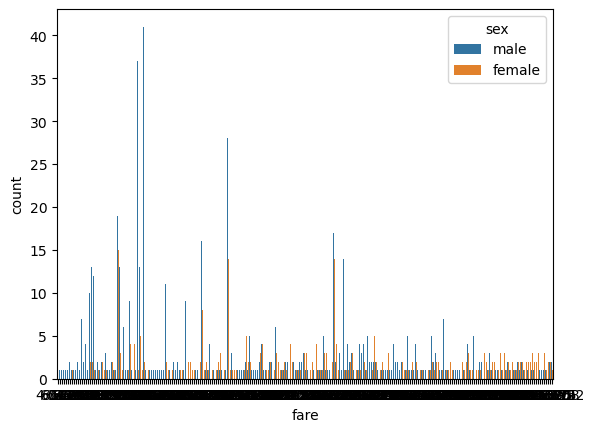

In [39]:
sns.countplot(x='fare', hue='sex', data=df)

<Axes: xlabel='pclass', ylabel='age'>

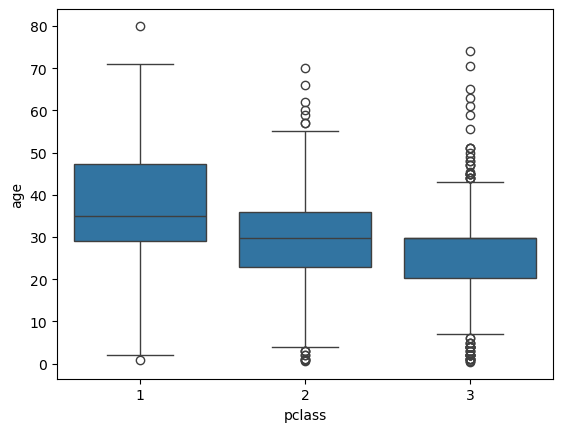

In [40]:
sns.boxplot(x='pclass', y='age', data=df)

<Axes: >

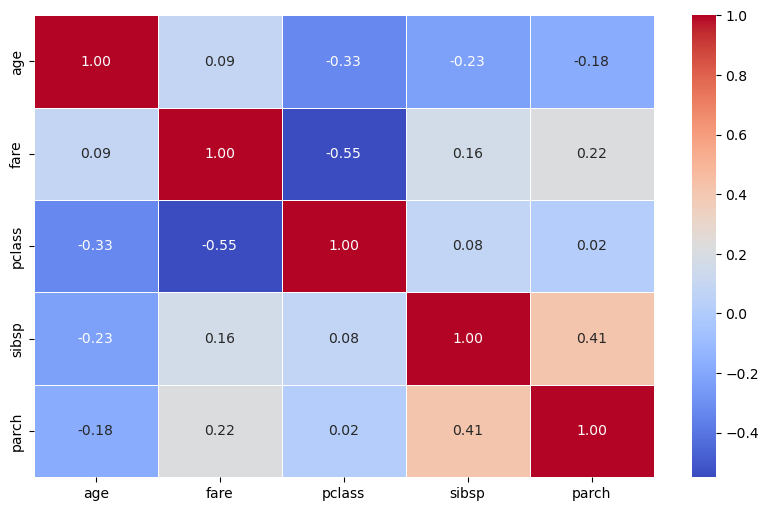

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [44]:
df_cleaned = df.drop(columns=['deck', 'alive', 'alone', 'who', 'embark_town'], errors='ignore')

In [45]:
df_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male
0,0,3,male,22.0,1,0,7.2500,S,Third,True
1,1,1,female,38.0,1,0,71.2833,C,First,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False
3,1,1,female,35.0,1,0,53.1000,S,First,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True


In [46]:
df_cleaned= df.copy()

In [47]:
df_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [50]:
df_cleaned.shape

(780, 14)

In [49]:
df_cleaned.drop_duplicates(inplace=True)

In [51]:
df_cleaned.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [52]:
df_cleaned= df_cleaned.dropna()

In [53]:
df_cleaned

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [54]:
df_cleaned["age"].value_counts()

age
29.699118    104
24.000000     29
18.000000     25
22.000000     24
19.000000     23
            ... 
36.500000      1
0.920000       1
23.500000      1
55.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

In [55]:
df['fare'].value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [59]:
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 18, 60, np.inf], labels=['child', 'adult', 'senior'])

In [60]:
df_cleaned

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,<function cut at 0x000001587ACB4F40>,Southampton,no,False,adult
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,<function cut at 0x000001587ACB4F40>,Cherbourg,yes,False,adult
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,<function cut at 0x000001587ACB4F40>,Southampton,yes,True,adult
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,<function cut at 0x000001587ACB4F40>,Southampton,yes,False,adult
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,<function cut at 0x000001587ACB4F40>,Southampton,no,True,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,<function cut at 0x000001587ACB4F40>,Queenstown,no,False,adult
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,<function cut at 0x000001587ACB4F40>,Southampton,yes,True,adult
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,<function cut at 0x000001587ACB4F40>,Southampton,no,False,adult
889,1,1,male,26.000000,0,0,30.0000,C,First,man,<function cut at 0x000001587ACB4F40>,Cherbourg,yes,True,adult
